In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Dataset
df = pd.read_csv("Obfuscated-MalMem2022.csv")
print("Initial Dataset:")
print(df.dtypes)

Initial Dataset:
Category                                   object
pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                              int64
handles.nsection                 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Load Dataset
df = pd.read_csv("Obfuscated-MalMem2022.csv")

In [ ]:
# Data Preparation
# Encode the categorical features
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
df['Class_encoded'] = le.fit_transform(df['Class'])

# Define features and target
X = df.drop(['Category', 'Class', 'Category_encoded', 'Class_encoded'], axis=1)
y = df['Class_encoded']


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline with scaling
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])


In [ ]:
# Define models to evaluate
models = {
    'Random Forest': create_pipeline(RandomForestClassifier(random_state=42, n_estimators=100)),
    'Logistic Regression': create_pipeline(LogisticRegression(random_state=42, max_iter=1000)),
    'SVM': create_pipeline(SVC(random_state=42, probability=True)),
    'KNN': create_pipeline(KNeighborsClassifier(n_neighbors=5))
}

# Train and evaluate models
results = {}
cv_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()


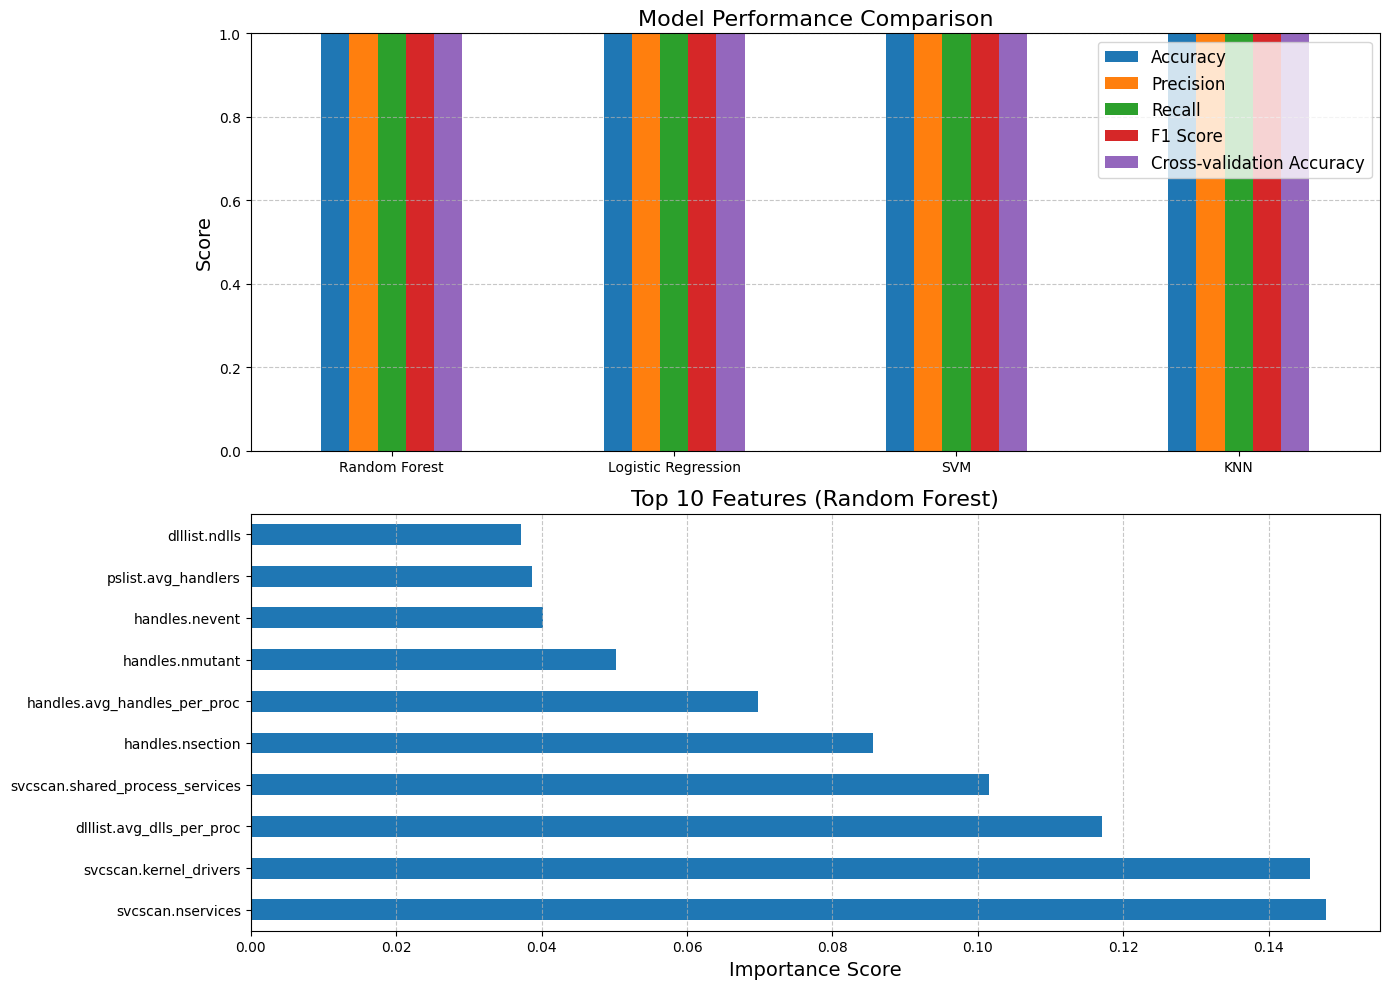

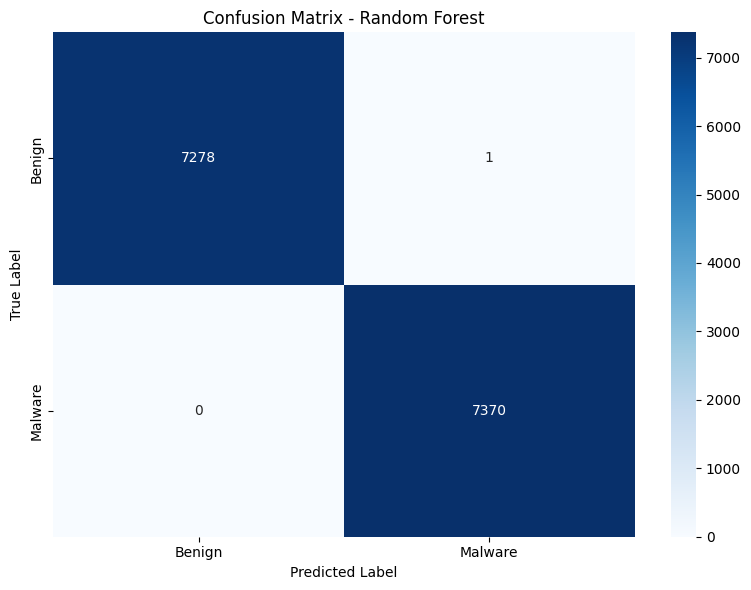


Detailed Model Performance:

Random Forest:
  Accuracy: 0.9999
  Precision: 0.9999
  Recall: 0.9999
  F1 Score: 0.9999
  Cross-validation Accuracy: 0.9988

Logistic Regression:
  Accuracy: 0.9990
  Precision: 0.9990
  Recall: 0.9990
  F1 Score: 0.9990
  Cross-validation Accuracy: 0.9983

SVM:
  Accuracy: 0.9994
  Precision: 0.9994
  Recall: 0.9994
  F1 Score: 0.9994
  Cross-validation Accuracy: 0.9985

KNN:
  Accuracy: 0.9997
  Precision: 0.9997
  Recall: 0.9997
  F1 Score: 0.9997
  Cross-validation Accuracy: 0.9988

Best performing model: Random Forest


In [20]:
# Create DataFrame from results for plotting
metrics_df = pd.DataFrame(results).T
metrics_df['Cross-validation Accuracy'] = pd.Series(cv_results)

# Plot the results
plt.figure(figsize=(14, 10))

# Bar chart for all metrics
ax1 = plt.subplot(2, 1, 1)
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cross-validation Accuracy']].plot(kind='bar', ax=ax1, rot=0)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Feature importance (for Random Forest only)
ax2 = plt.subplot(2, 1, 2)
rf_model = models['Random Forest'].named_steps['model']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False)[:10]
top_features.plot(kind='barh', ax=ax2)
plt.title('Top 10 Features (Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate confusion matrix for the best model
best_model_name = metrics_df['Accuracy'].idxmax()
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed results
print("\nDetailed Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print(f"  Cross-validation Accuracy: {cv_results[name]:.4f}")

print("\nBest performing model:", best_model_name)